In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extracting csv data set from system using pandas lib

data=pd.read_csv('C:/Users/Saee/Downloads/Heart Disease data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#All columns in a data set

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

There are thirteen features in Dataset

age: The person's age in years

sex:the person's sex(1=male,0=female)

cp:the chest pain experience (Value 1:typical angina ,value 2:atypical angina ,Value 3:non-anginal pain,Value 4:asymptomatic)

trestbps:the person's resting blood pressure(mm Hg on admission to the Hospital)

chol:the person's cholesterol measurement in mg/dl

fbs:the persons fasting blood sugar(>120 mg /dl,1=true ;0=false)

restecg:resting electrocardiographic measurements(0=norma;l,1=having ST-T wave abnormality,2=showing probable or definite left ventricular hetrophy by Estes' criteria)

thalach:The person's maximum heart rate achieved

exang:Exercise induced angina (1=yes ,0=no)

oldpeak: ST depression induced by exercise relative to rest

slope:the slope of peak exercise ST segment(Value 1=upsloping ,value 2= flat, value 3=downsloping

ca:the numb

thal:A blood disorder called thalassemia (0=normal,1=fixed detected,2=reversable detect)

target:heart disease (0=no ,1= yes)er of major vessels(0-3)

In [5]:
#checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

THERE IS NO MISSING VALUES IN OUR DATASET

***Percentage of people having Heart Disease***

In [8]:
target=data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [9]:
#Converting numerical data into categorical data

def heartdisease(row):
    if row==0:
        return'absence'
    elif row==1:
        return'presence'

In [10]:
#Applying converted data into our dataset with new column - heart disease

data['Heart_Disease']=data['target'].apply(heartdisease)
data.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target Heart_Disease  

In [11]:
hd=data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
absence     499
presence    526
Name: target, dtype: int64

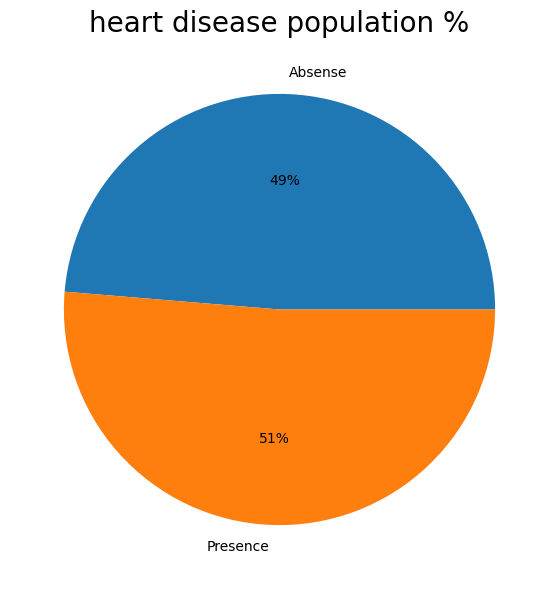

In [12]:
#Pie chart of population having heart disease using matploptlib

plt.figure(figsize=(10,7))
plt.pie(hd,labels=['Absense','Presence'],autopct='%0.0f%%')
plt.title('heart disease population %',fontsize=20)
plt.show()

**From the overall population ,population having heart disease (51%) are higher than those who dont have heart disease(49%)** 

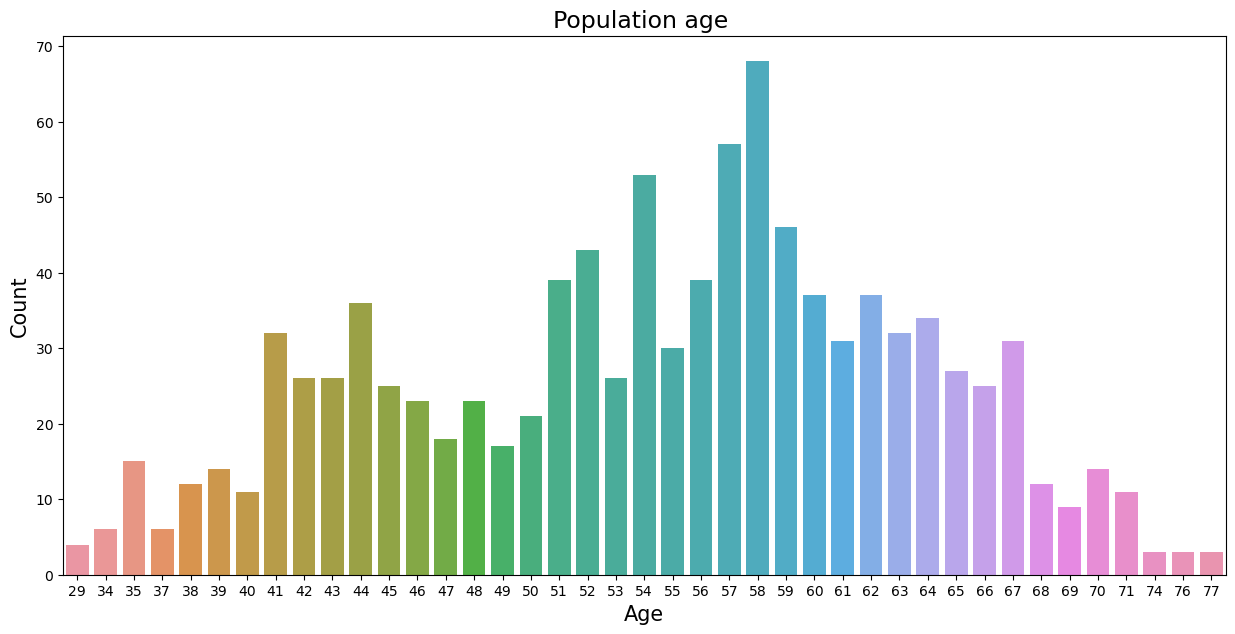

In [14]:
#countplot creation of population age using matplotlib and seaborn 

plt.figure(figsize=(15,7))
sns.countplot(x='age',data=data)
plt.title('Population age ',fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [15]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age=",Min_Age)
print("Maximum Age=",Max_Age)
print("Mean Age=",Mean_Age)

Minimum Age= 29
Maximum Age= 77
Mean Age= 54.43414634146342


In [16]:
#categorical Analysis

Young_Ages=data[(data['age']>29)&(data['age']<40)]
Middle_Ages=data[(data['age']>=40)&(data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young ages=',len(Young_Ages))
print('Middle ages=',len(Middle_Ages))
print('Elderly ages=',len(Elderly_Ages))

                                   

Young ages= 53
Middle ages= 419
Elderly ages= 519


In [17]:
#Converting numerical data into categorical data

def gender(row):
    if row==1:
        return'male'
    elif row==0:
        return'female'

In [18]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target Heart_Disease  

In [19]:
#Converting numerical data into categorical data

def age_range(row):
    if row>=29 and row<40:
        return'Young Age'
    elif row>=40 and row<55:
        return'Middle Age'
    elif row>55:
        return'Elder Age'

In [20]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,female,Elder Age


ValueError: 'Orange_r' is not a valid palette name

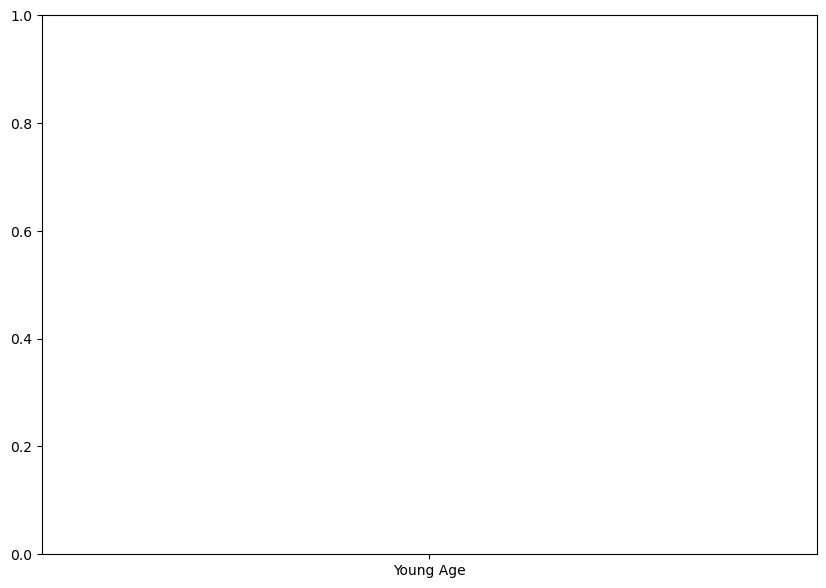

In [21]:
#swarm plot creation of gender based age category using matplotlib and seaborn 

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range',y='age',hue='sex1',data=data,order=['Young Age','Middle Age','Elder Age'],palette='Orange_r')
plt.title('Gender Based Age Category',fontsize=17)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

In [ ]:
#count plot creation of heart disease based on age category using matplotlib and seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age','Middle Age','Elder Age']
sns.countplot(x='Heart_Disease',hue='Age_Range',data=data,order=['Presence','Absence'],hue_order=hue_order,palette='pastel1_r')
plt.xlabel('Heart Disease Based on Age Category',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()
              

In [ ]:
#count plot creation of heart disease based on age gender using matplotlib and seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'],hue='sex1',data=data,palette='BuGn_r')
plt.xlabel('Heart Disease ',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('heart disease based on gender',fontsize=17)
plt.show()


In [ ]:
#count plot creation of chest pain experienced using matplotlib and seaborn

sns.countplot(x=data['Heart_Disease'],hue='cp',data=data,order=['Presence','Absence'])
plt.title('chest pain experienced',fontsize=17)
plt.xlabel('Heart Disease ',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina ','Non-Anginal Pain ','Asymptomatic'])
plt.show()







In [ ]:
#count plot creation of chest pain based on gender using matplotlib and seaborn

sns.countplot(x=data['sex1'],hue='cp',data=data)
plt.title('chest pain based on gender',fontsize=17)
plt.xlabel('Sex ',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina ','Non-Anginal Pain ','Asymptomatic'])
plt.show()



In [ ]:
#barplot creation of  person's resting blood pressure(mmHg) using matplotlib and seaborn

sns.barplot(x='sex1',y='trestbps',data=data,palette='plasma')
plt.title("blood pressure",fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting blood pressure(mmHg)",fontsize=12)
plt.show()



In [ ]:
#barplot creation of  Cholestrol level based on gender  using matplotlib and seaborn

sns.barplot(x='sex1',y='chol',data=data,palette='turbo')
plt.title("Cholestrol level based on gender",fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol",fontsize=15)
plt.show()


In [ ]:
#barplot creation of  cholestrol VS heart disease using matplotlib and seaborn

sns.barplot(x='Heart_Disease',y='chol',data=data,colour='ocean_r')
plt.title("cholestrol VS heart disease",fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Cholestrol",fontsize=15)
plt.show()


In [ ]:
#barplot creation of  Blood Pressure VS heart disease using matplotlib and seaborn

sns.barplot(x='Heart_Disease',y='trestbps',data=data,colour='tab20b_r')
plt.title("Blood Pressure VS heart disease",fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Blood Pressure",fontsize=15)
plt.show()

In [ ]:
#lineplot creation of  Blood pressure VS Age using matplotlib and seaborn

sns.lineplot(x='age',y='trestbps',data=data,colour='r')
plt.title("Blood pressure VS Age",fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel("Blood pressure",fontsize=15)
plt.show()



In [ ]:
#lineplot creation of  cholestrol VS Age using matplotlib and seaborn

sns.lineplot(x='age',y='trestbps',data=data,colour='b')
plt.title("Cholestrol VS Age",fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel("Cholestrol",fontsize=15)
plt.show()

In [ ]:
#barplot creation of  ST depression VS heart disease using matplotlib and seaborn

sns.barplot(x='sex1',y='oldpeak',data=data,palette='twilight_r')
plt.title("ST depression VS heart disease",fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("ST depression",fontsize=15)
plt.show()

In [ ]:
#barplot creation of Exercise with angina VS heart disease using matplotlib and seaborn

sns.barplot(x='Heart_Disease',y='exang',data=data,palette='virdis')
plt.title("Exercise with angina VS heart disease",fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel("Exercise with angina ",fontsize=15)
plt.show()